## Airbnb Buenos Aires

Importing necessary librarys

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Import data

In [28]:
df_reviews = pd.read_csv('../raw_data/reviews.csv')
df_listings = pd.read_csv('../raw_data/listings.csv')
df_reviews_data = pd.read_csv('../raw_data/reviews_data.csv')

In [29]:
rows=df_reviews_data.shape[0] 
cols=df_reviews_data.shape[1]
print("Rows: " + str(rows))
print("Columns: " + str(cols))

Rows: 334017
Columns: 6


In [30]:
df_listings.drop_duplicates(subset=['id'], keep=False)
df_reviews_data.drop_duplicates(subset=['listing_id'], keep=False)

,listing_id,id,date,reviewer_id,reviewer_name,comments
92,13095,359897523,2018-12-18,18340895,Erin,Perfect spot to visit Palermo. Ariel and his s...
105,13097,569753871,2019-11-27,4012966,David,A really charming B&B in a neighborhood filled...
107,13100,213850710,2017-11-23,159508626,Alan,Gracias
366,6001119,469360398,2019-06-14,195166790,Geni,El departamento de Elena es un lugar muy lindo...
404,4894196,490422739,2019-07-18,61086720,Fernando,"Excelente lugar, super recomendable para una e..."
...,...,...,...,...,...,...
333305,571502364088389409,606415731433209155,2022-04-16,163065462,Eliot,"Nunca contestó mis mensajes, mucho menos las l..."
333638,29131561,431679512,2019-04-01,242399865,Kevin,"Todo excelente, Mercedes una genia y siempre m..."
333729,53706284,605742396991325533,2022-04-15,433353987,Rodrigo,lindo lugar
333743,649291216311024623,653570719033653983,2022-06-20,246791422,Cynthia,Un departamento hermoso y bien equipado en una...


Setting the id as index

In [31]:
df_listings = df_listings.rename(columns={'id':'listing_id'})
df_listings =df_listings.set_index('listing_id')
df_reviews = df_reviews.set_index('listing_id')
df_reviews_data = df_reviews_data.set_index('listing_id')

Joining both dataframes

In [32]:
merged_df = df_listings.join(df_reviews_data)

In [33]:
merged_df.head(5)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,id,date,reviewer_id,reviewer_name,comments
listing_id,,,,,,,,,,,,,,,,,,,,,
11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,NaN,Palermo,-34.58184,-58.42415,Entire home/apt,8010,2,...,0.22,1,292,0,NaN,1615861.0,2012-07-02,877808.0,Charlie,Amazing place!\r<br/>\r<br/>Location: short wa...
11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,NaN,Palermo,-34.58184,-58.42415,Entire home/apt,8010,2,...,0.22,1,292,0,NaN,3157005.0,2012-12-26,656077.0,Shaily,Really enjoyed Candela's recommendations and q...
11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,NaN,Palermo,-34.58184,-58.42415,Entire home/apt,8010,2,...,0.22,1,292,0,NaN,3281011.0,2013-01-05,2835998.0,Michiel,Candela and her colleague were very attentive ...
11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,NaN,Palermo,-34.58184,-58.42415,Entire home/apt,8010,2,...,0.22,1,292,0,NaN,6050019.0,2013-07-28,4600436.0,Tara,"The apartment was in a beautiful, modern build..."
11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,NaN,Palermo,-34.58184,-58.42415,Entire home/apt,8010,2,...,0.22,1,292,0,NaN,9328455.0,2013-12-22,3130017.0,Simon,My stay at Candela's apartment was very enjoya...


Droping columns that are useless

In [34]:
airbnb = merged_df.drop(columns = ['neighbourhood_group','latitude','longitude','license','host_name'])

Exploring and fixing data

In [35]:
#Managing null
airbnb.isnull().sum().sort_values(ascending=False)

comments                          3540
last_review                       3527
reviewer_name                     3527
reviewer_id                       3527
date                              3527
id                                3527
reviews_per_month                 3527
name                                 4
number_of_reviews                    0
host_id                              0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
minimum_nights                       0
price                                0
room_type                            0
neighbourhood                        0
dtype: int64

In [36]:
#Managing Nan  
airbnb.isna().sum().sort_values()


host_id                              0
neighbourhood                        0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
name                                 4
reviewer_id                       3527
date                              3527
reviews_per_month                 3527
reviewer_name                     3527
last_review                       3527
id                                3527
comments                          3540
dtype: int64

In [37]:
airbnb['comments'].fillna('no comments',inplace=True)
airbnb['reviewer_name'].fillna('no name',inplace=True)
airbnb['reviewer_id'].fillna('no name',inplace=True)
airbnb['comments'].fillna('no comment',inplace=True)
airbnb['date'].fillna('no comment',inplace=True)

In [38]:
airbnb.fillna('0',inplace=True) 

In [39]:
rows=airbnb.shape[0] 
cols=airbnb.shape[1]
print("Rows: " + str(rows))
print("Columns: " + str(cols))


Rows: 337544
Columns: 17


In [40]:
#Renaming and droping duplicates
airbnb.rename(columns={'availability_365':'Days_not_booked'},inplace=True)  
airbnb.drop_duplicates(subset=['name'], keep=False)

,name,host_id,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,Days_not_booked,number_of_reviews_ltm,id,date,reviewer_id,reviewer_name,comments
listing_id,,,,,,,,,,,,,,,,,
13095,Standard Room at Palermo Viejo B&B w pvt Bath,50994,Palermo,Private room,5693,1,1,2018-12-18,0.02,7,364,0,359897523.0,2018-12-18,18340895.0,Erin,Perfect spot to visit Palermo. Ariel and his s...
13096,Standard Room in Palermo Viejo B&B,50994,Palermo,Private room,5693,1,0,0,0,7,365,0,0,no comment,no name,no name,no comments
13097,Standard Room at Palermo Viejo B&B pvt bath,50994,Palermo,Private room,5693,1,1,2019-11-27,0.03,7,365,0,569753871.0,2019-11-27,4012966.0,David,A really charming B&B in a neighborhood filled...
13099,Lofty room in Palermo Viejo B&B pvt bath,50994,Palermo,Private room,6391,1,0,0,0,7,365,0,0,no comment,no name,no name,no comments
13100,Master Room in Palermo Viejo B&B w pvt Bath,50994,Palermo,Private room,7553,1,1,2017-11-23,0.02,7,365,0,213850710.0,2017-11-23,159508626.0,Alan,Gracias
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653658043982791227,Unique home in the heart of Palermo,137090771,Palermo,Entire home/apt,9436,5,0,0,0,2,178,0,0,no comment,no name,no name,no comments
653662459361579364,"HERMOSO DEPARTAMENTO EN PALERMO, BALCON,2 /3 PAX",49480723,Palermo,Entire home/apt,6162,1,0,0,0,34,365,0,0,no comment,no name,no name,no comments
653672799237838844,Hermoso Departamento Nuevo en Belgrano (2C),117955293,Belgrano,Entire home/apt,3450,12,0,0,0,9,147,0,0,no comment,no name,no name,no comments


In [41]:
airbnb.dtypes

name                              object
host_id                            int64
neighbourhood                     object
room_type                         object
price                              int64
minimum_nights                     int64
number_of_reviews                  int64
last_review                       object
reviews_per_month                 object
calculated_host_listings_count     int64
Days_not_booked                    int64
number_of_reviews_ltm              int64
id                                object
date                              object
reviewer_id                       object
reviewer_name                     object
comments                          object
dtype: object

Which are the neighbourhoods that are more expensive?


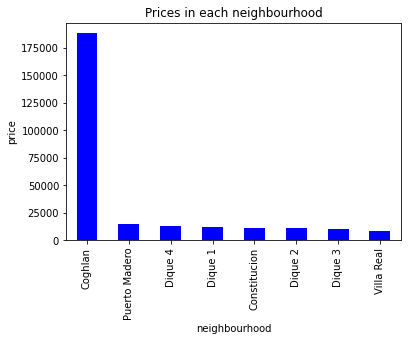

In [42]:
group_neigh= airbnb['price'].groupby(airbnb['neighbourhood']).mean().sort_values(ascending=False)
top8 = group_neigh.head(8)
top8.plot.bar(ylabel='price', title="Prices in each neighbourhood", color='blue');

How many bookings had each neighbourhood?

In [43]:
#Adding a column that calculate the days that are booked:
airbnb['Days_booked']= (airbnb['Days_not_booked']-365)*-1
#Grouping by neighbourhood and calculating de mean of the days that are not rented throughout a year 
airbnb_booked=airbnb.groupby(['neighbourhood']).sum().head(8)
airbnb_booked['Days_booked'].sort_values(ascending=False)


neighbourhood
Belgrano     1844258
Balvanera    1475007
Almagro      1264817
Caballito     519837
Barracas      147947
Boedo         135985
Boca          109228
Agronomia      33770
Name: Days_booked, dtype: int64

How many listings has the neighbourhoods more popular?

In [44]:
top_3_neigh = pd.DataFrame(airbnb['neighbourhood'].value_counts().head(3))
top_3_neigh.columns=['Listings']
top_3_neigh['Neighbourhood'] = top_3_neigh.index
top_3_neigh.reset_index(drop=True, inplace=True)
top_3_neigh

,Listings,Neighbourhood
0,142572,Palermo
1,54694,Recoleta
2,23880,San Nicolas


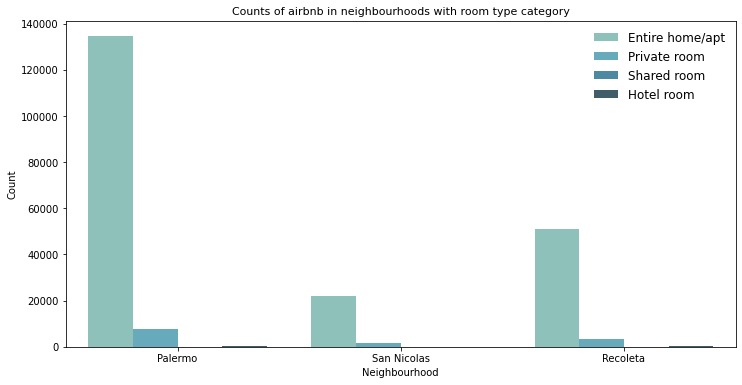

In [45]:
# Visualisation 1 - Neighbourhood groups with counts with category room_type
some_neigh=airbnb.loc[airbnb['neighbourhood'].isin(['Recoleta','Palermo','San Nicolas'])]
plt.figure(figsize=(12,6))
sns.countplot(data=some_neigh, x='neighbourhood', hue='room_type', palette='GnBu_d')
plt.title('Counts of airbnb in neighbourhoods with room type category', fontsize=11)
plt.xlabel('Neighbourhood')
plt.ylabel("Count")
plt.legend(frameon=False, fontsize=12)

Text(0, 0.5, 'Price')

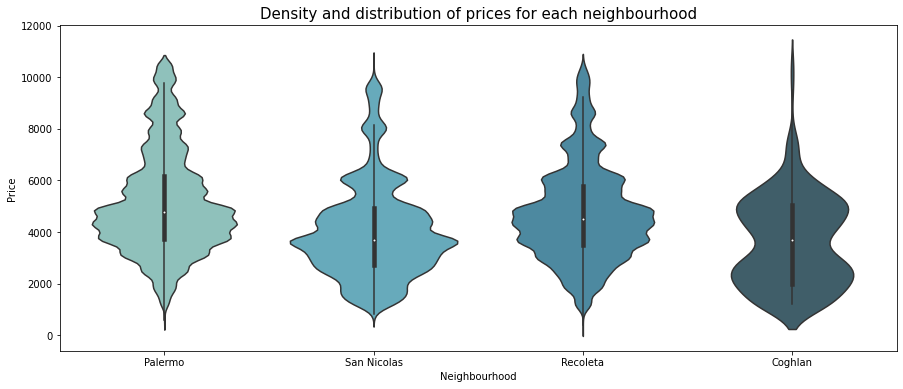

In [46]:
plt.figure(figsize=(15,6))
data=airbnb.loc[airbnb['neighbourhood'].isin(['Recoleta','Palermo','San Nicolas','Coghlan'])]
sns.violinplot(data=data[data.price <10500], x='neighbourhood', y='price', palette='GnBu_d')
plt.title('Density and distribution of prices for each neighbourhood', fontsize=15)
plt.xlabel('Neighbourhood')
plt.ylabel("Price")

/home/beluplanas/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

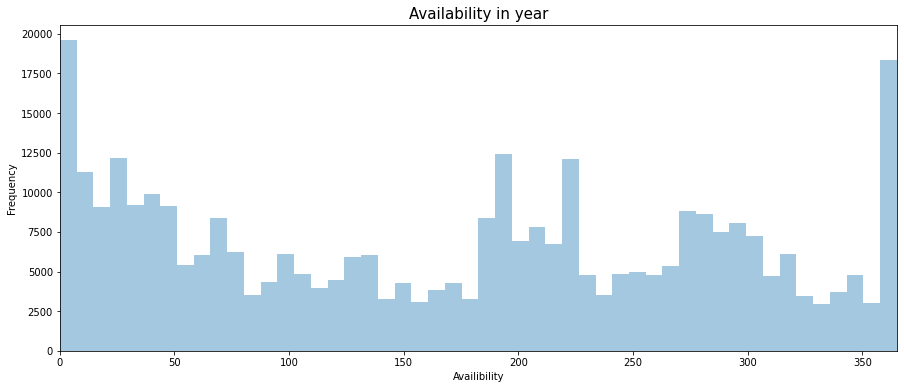

In [47]:
# Visualisation 5 - availability in year

plt.figure(figsize=(15,6))
sns.distplot(airbnb.Days_booked, kde=False)
plt.xlim(0,365)
plt.title('Availability in year', fontsize=15)
plt.xlabel('Availibility')
plt.ylabel("Frequency")

Correlation between values

<AxesSubplot:>

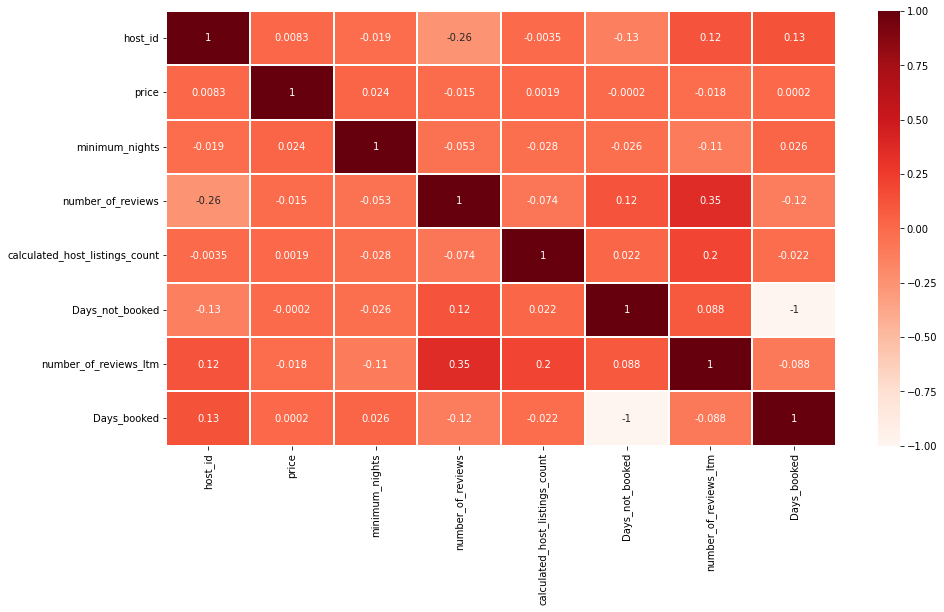

In [48]:
plt.figure(figsize=(15,8))
sns.heatmap(airbnb.corr(), annot=True, linewidths=0.1, cmap='Reds')

How much the price increase depending of the type of the room?

In [49]:
airbnb_type=airbnb.groupby(airbnb['room_type']).mean().head(8)
airbnb_type['price'].sort_values(ascending=False)


room_type
Hotel room         23590.357500
Entire home/apt     6906.327892
Shared room         5779.836007
Private room        3352.440067
Name: price, dtype: float64

🏨 are the most expensive one! thats why we always stay in airbnbs!

Relation between days rented and amount of reviews. Does people care about the amount of reviews?

In [50]:
airbnb.rename(columns={'number_of_reviews_ltm':'amount_reviews'},inplace=True)  
sns.boxplot(x='amount_reviews', y='Days_booked', data=some_neigh)

ValueError: Could not interpret input 'amount_reviews'

In [ ]:
airbnb_others = airbnb.loc[(airbnb.neighbourhood!= 'Recoleta')]

Lets make a 🔎 to Recoleta that we are more interested in:

In [ ]:
#Create a special Dataframe only with Recoleta
airbnb_recoleta = airbnb.loc[(airbnb.neighbourhood== 'Recoleta')]

First, lest check how many competition do we have:

In [ ]:
len(airbnb_recoleta)

54694

There are 54.694 different airbnbs en Recoleta! 🥴
And the average price is 6.258$

In [ ]:
airbnb_recoleta['price'].mean()

6258.534117087797

Lets get a little bit more info about the price:

In [ ]:
average_price_ava = pd.DataFrame(airbnb_recoleta[['price', 'Days_booked']].describe())
average_price_ava.columns=['Price', 'Availability in a year']
average_price_ava

,Price,Availability in a year
count,5.469400e+04,54694.000000
mean,6.258534e+03,166.727392
std,1.035788e+04,112.342287
min,4.000000e+02,0.000000
25%,3.697000e+03,54.000000
50%,4.683000e+03,171.000000
75%,6.162000e+03,268.000000
max,1.232317e+06,365.000000


Now that we have information about the price, lets find out what people like the most. We will see what people say in their comments:

In [ ]:
#Specific imports
from nltk.corpus import stopwords
import spacy
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
import nltk

In [ ]:
comments = airbnb_recoleta.loc[airbnb_recoleta['comments'] != 'no comments']['comments']
stopwords = stopwords.words('english')
ignore_words = ['names']

NameError: name 'airbnb_recoleta' is not defined

In [ ]:
def comentarios(texts):
    final = []
    for text in texts:
        new = gensim.utils.simple_preprocess(text, deacc=True)
        final_words = [word for word in new if not word in ignore_words]
        final.append(final_words)
    return (final)

In [ ]:
def lemmatization(texts, allowed_postags=["ADJ"]):
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    texts_out = []
    for text in texts:
        doc = nlp(text)
        new_text = []
        for token in doc:
            if token.pos_ in allowed_postags:
                new_text.append(token.lemma_)
        final = " ".join(new_text)
        texts_out.append(final)
    return (texts_out)

In [ ]:
lemma_comments= lemmatization(comments)
nltk.FreqDist(lemma_comments.words())